### 1. Clean raw answers

In [1]:
# List of CSV files representing different tasks
csv_files = [
    './bar_result.csv',
    './pie_result.csv',
]

In [2]:
pwd

'/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-5epochs/EXP2-Results-nonspecificprompt'

In [5]:
import pandas as pd
import numpy as np
import re
import os

def clean_raw_answers(file_path):
    """
    Clean raw answers from CSV file by extracting only the last list of numbers in the last sentence,
    dividing each number by 100 if it's greater than 1, setting the first number to 1, 
    and rounding all numbers to 2 decimal places.
    
    Parameters:
    file_path (str): Path to the CSV file
    
    Returns:
    pandas.DataFrame: DataFrame with cleaned parsed answers
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    def extract_digits(x):
        if pd.isna(x):
            return np.nan
        
        # Convert to string and split by sentence-ending punctuation
        x = str(x).strip().replace('\n', '')
        sentences = re.split(r'[.!?]\s+', x)
        last_sentence = sentences[-1] if sentences else ""
        
        # Extract the last list of numbers within square brackets
        match = re.search(r'\[([\d.,\s]+)\]', last_sentence)
        if match:
            # Parse numbers from the matched group and convert them to floats
            numbers = [float(num.strip()) for num in match.group(1).split(',')]
            
            # Apply transformations: divide by 100 if >1, set the first number to 1, and round
            adjusted_numbers = [num / 100 if num > 1 else num for num in numbers]
            adjusted_numbers[0] = 1.0  # Set the first number to 1
            rounded_numbers = [round(num, 2) for num in adjusted_numbers]
            
            return rounded_numbers
        else:
            return np.nan
    
    # Apply extraction and transformation logic to raw answers
    df['parsed_answers'] = df['raw_answers'].apply(extract_digits)

    print(f"Row count before dropping NaN: {len(df)}")
    df = df.dropna(subset=['parsed_answers'])
    print(f"Row count after dropping NaN: {len(df)}")
    
    return df

# Directory path containing the CSV files
csv_dir = "/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-5epochs/EXP2-Results-nonspecificprompt"
csv_files = [os.path.join(csv_dir, f) for f in os.listdir(csv_dir) if f.endswith('_results.csv')]

# Dictionary to store cleaned DataFrames for each file
cleaned_dataframes = {}
for file_path in csv_files:
    try:
        cleaned_df = clean_raw_answers(file_path)
        filename = os.path.basename(file_path).replace("_results.csv", "")
        cleaned_dataframes[filename] = cleaned_df
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Access each cleaned DataFrame by task name
df_bar = cleaned_dataframes.get('bar')
df_pie = cleaned_dataframes.get('pie')


Row count before dropping NaN: 101
Row count after dropping NaN: 100
Row count before dropping NaN: 101
Row count after dropping NaN: 100


### 2. Check dataframe

In [6]:
# Set display options to show all rows and all columns
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)  # Set to None to display full cell content

df_pie

,model_name,run,image_path,ground_truth,raw_answers,parsed_answers
0,CustomLLaMA,run_0,EXP2-Results/pie/pie_image_1.png,"[1.0, 0.2857143, 0.6857143, 0.51428574, 0.3714...","user\nFirst, make a list of five values where ...","[1.0, 0.29, 0.68, 0.59, 0.44]"
1,CustomLLaMA,run_0,EXP2-Results/pie/pie_image_2.png,"[1.0, 0.90909094, 0.57575756, 0.21212122, 0.33...","user\nFirst, make a list of five values where ...","[1.0, 0.91, 0.64, 0.19, 0.38]"
2,CustomLLaMA,run_0,EXP2-Results/pie/pie_image_3.png,"[1.0, 0.33333334, 0.6969697, 0.42424244, 0.575...","user\nFirst, make a list of five values where ...","[1.0, 0.38, 0.7, 0.44, 0.64]"
3,CustomLLaMA,run_0,EXP2-Results/pie/pie_image_4.png,"[1.0, 0.35897437, 0.12820514, 0.61538464, 0.46...","user\nFirst, make a list of five values where ...","[1.0, 0.38, 0.14, 0.61, 0.53]"
4,CustomLLaMA,run_0,EXP2-Results/pie/pie_image_5.png,"[1.0, 0.25641027, 0.12820514, 0.43589744, 0.74...","user\nFirst, make a list of five values where ...","[1.0, 0.29, 0.14, 0.51, 0.86]"
...,...,...,...,...,...,...
95,CustomLLaMA,run_0,EXP2-Results/pie/pie_image_96.png,"[1.0, 0.8, 0.46666667, 0.36666667, 0.7]","user\nFirst, make a list of five values where ...","[1.0, 0.8, 0.47, 0.4, 0.69]"
96,CustomLLaMA,run_0,EXP2-Results/pie/pie_image_97.png,"[1.0, 0.78125, 0.40625, 0.65625, 0.28125]","user\nFirst, make a list of five values where ...","[1.0, 0.81, 0.39, 0.68, 0.32]"
97,CustomLLaMA,run_0,EXP2-Results/pie/pie_image_98.png,"[1.0, 0.64705884, 0.88235295, 0.14705883, 0.26...","user\nFirst, make a list of five values where ...","[1.0, 0.65, 0.77, 0.15, 0.23]"
98,CustomLLaMA,run_0,EXP2-Results/pie/pie_image_99.png,"[1.0, 0.3888889, 0.5, 0.30555555, 0.5833333]","user\nFirst, make a list of five values where ...","[1.0, 0.43, 0.46, 0.35, 0.59]"


In [7]:
df_bar



,model_name,run,image_path,ground_truth,raw_answers,parsed_answers
0,CustomLLaMA,run_0,EXP2-Results/bar/bar_image_1.png,"[1.0, 0.375, 0.71875, 0.46875, 0.5625]","user\nFirst, make a list of five values where ...","[1.0, 0.38, 0.7, 0.47, 0.56]"
1,CustomLLaMA,run_0,EXP2-Results/bar/bar_image_2.png,"[1.0, 0.34210527, 0.7368421, 0.13157895, 0.421...","user\nFirst, make a list of five values where ...","[1.0, 0.37, 0.74, 0.16, 0.43]"
2,CustomLLaMA,run_0,EXP2-Results/bar/bar_image_3.png,"[1.0, 0.7368421, 0.13157895, 0.5263158, 0.2368...","user\nFirst, make a list of five values where ...","[1.0, 0.74, 0.17, 0.53, 0.26]"
3,CustomLLaMA,run_0,EXP2-Results/bar/bar_image_4.png,"[1.0, 0.2, 0.71428573, 0.37142858, 0.5714286]","user\nFirst, make a list of five values where ...","[1.0, 0.23, 0.71, 0.38, 0.57]"
4,CustomLLaMA,run_0,EXP2-Results/bar/bar_image_5.png,"[1.0, 0.11111111, 0.6944444, 0.3888889, 0.5833...","user\nFirst, make a list of five values where ...","[1.0, 0.14, 0.71, 0.4, 0.6]"
...,...,...,...,...,...,...
95,CustomLLaMA,run_0,EXP2-Results/bar/bar_image_96.png,"[1.0, 0.20588236, 0.4117647, 0.7941176, 0.5294...","user\nFirst, make a list of five values where ...","[1.0, 0.24, 0.41, 0.79, 0.53]"
96,CustomLLaMA,run_0,EXP2-Results/bar/bar_image_97.png,"[1.0, 0.6315789, 0.34210527, 0.10526316, 0.552...","user\nFirst, make a list of five values where ...","[1.0, 0.65, 0.35, 0.12, 0.57]"
97,CustomLLaMA,run_0,EXP2-Results/bar/bar_image_98.png,"[1.0, 0.57894737, 0.34210527, 0.2631579, 0.447...","user\nFirst, make a list of five values where ...","[1.0, 0.59, 0.35, 0.29, 0.44]"
98,CustomLLaMA,run_0,EXP2-Results/bar/bar_image_99.png,"[1.0, 0.5882353, 0.7058824, 0.2647059, 0.38235...","user\nFirst, make a list of five values where ...","[1.0, 0.6, 0.71, 0.29, 0.4]"


### 3. Validate_parsed_answers = raw_answers

In [51]:
import pandas as pd
import re
import numpy as np

def validate_parsed_answers(df):
    """
    Validate the parsed_answers column by re-applying the extraction logic
    and comparing with parsed_answers.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with raw_answers and parsed_answers
    
    Returns:
    pandas.DataFrame: DataFrame with validation results
    """
    
    def expected_parsed_answer(raw):
        if pd.isna(raw):
            return np.nan
            
        # Convert to string and clean up any newline characters
        raw = str(raw).strip().replace('\n', '')
        
        # Split into sentences and select the last sentence
        sentences = re.split(r'[.!?]\s+', raw)
        last_sentence = sentences[-1] if sentences else ""
        
        # Extract the last list of numbers in the last sentence
        match = re.search(r'\[([\d.,\s]+)\]', last_sentence)
        
        if match:
            # Split the matched numbers by commas, strip spaces, and convert each to a float
            numbers = [float(num.strip()) for num in match.group(1).split(',')]
            
            # Apply the same transformation as in clean_raw_answers
            # Divide numbers by 100 if greater than 1
            adjusted_numbers = [num / 100 if num > 1 else num for num in numbers]
            
            # Set the first number to 1.0
            adjusted_numbers[0] = 1.0
            
            # Round all numbers to 2 decimal places
            rounded_numbers = [round(num, 2) for num in adjusted_numbers]
            return rounded_numbers
        else:
            return np.nan

    # Apply the validation logic to create an expected column
    df['expected_parsed'] = df['raw_answers'].apply(expected_parsed_answer)
    
    # Compare parsed_answers with expected_parsed
    # Since parsed_answers and expected_parsed are lists, we need a list comparison
    df['is_correct'] = df.apply(lambda row: row['parsed_answers'] == row['expected_parsed'], axis=1)
    
    # Filter mismatches for easy review
    mismatches = df[df['is_correct'] == False]
    
    # Display mismatches for manual review
    if not mismatches.empty:
        print("Mismatches found:")
        print(mismatches[['raw_answers', 'parsed_answers', 'expected_parsed']])
    else:
        print("All parsed answers match the expected values.")
        
    return mismatches

# Example usage on a DataFrame, e.g., df_bar
mismatches = validate_parsed_answers(df_bar)


All parsed answers match the expected values.


### 4. Display all 2 images tasks

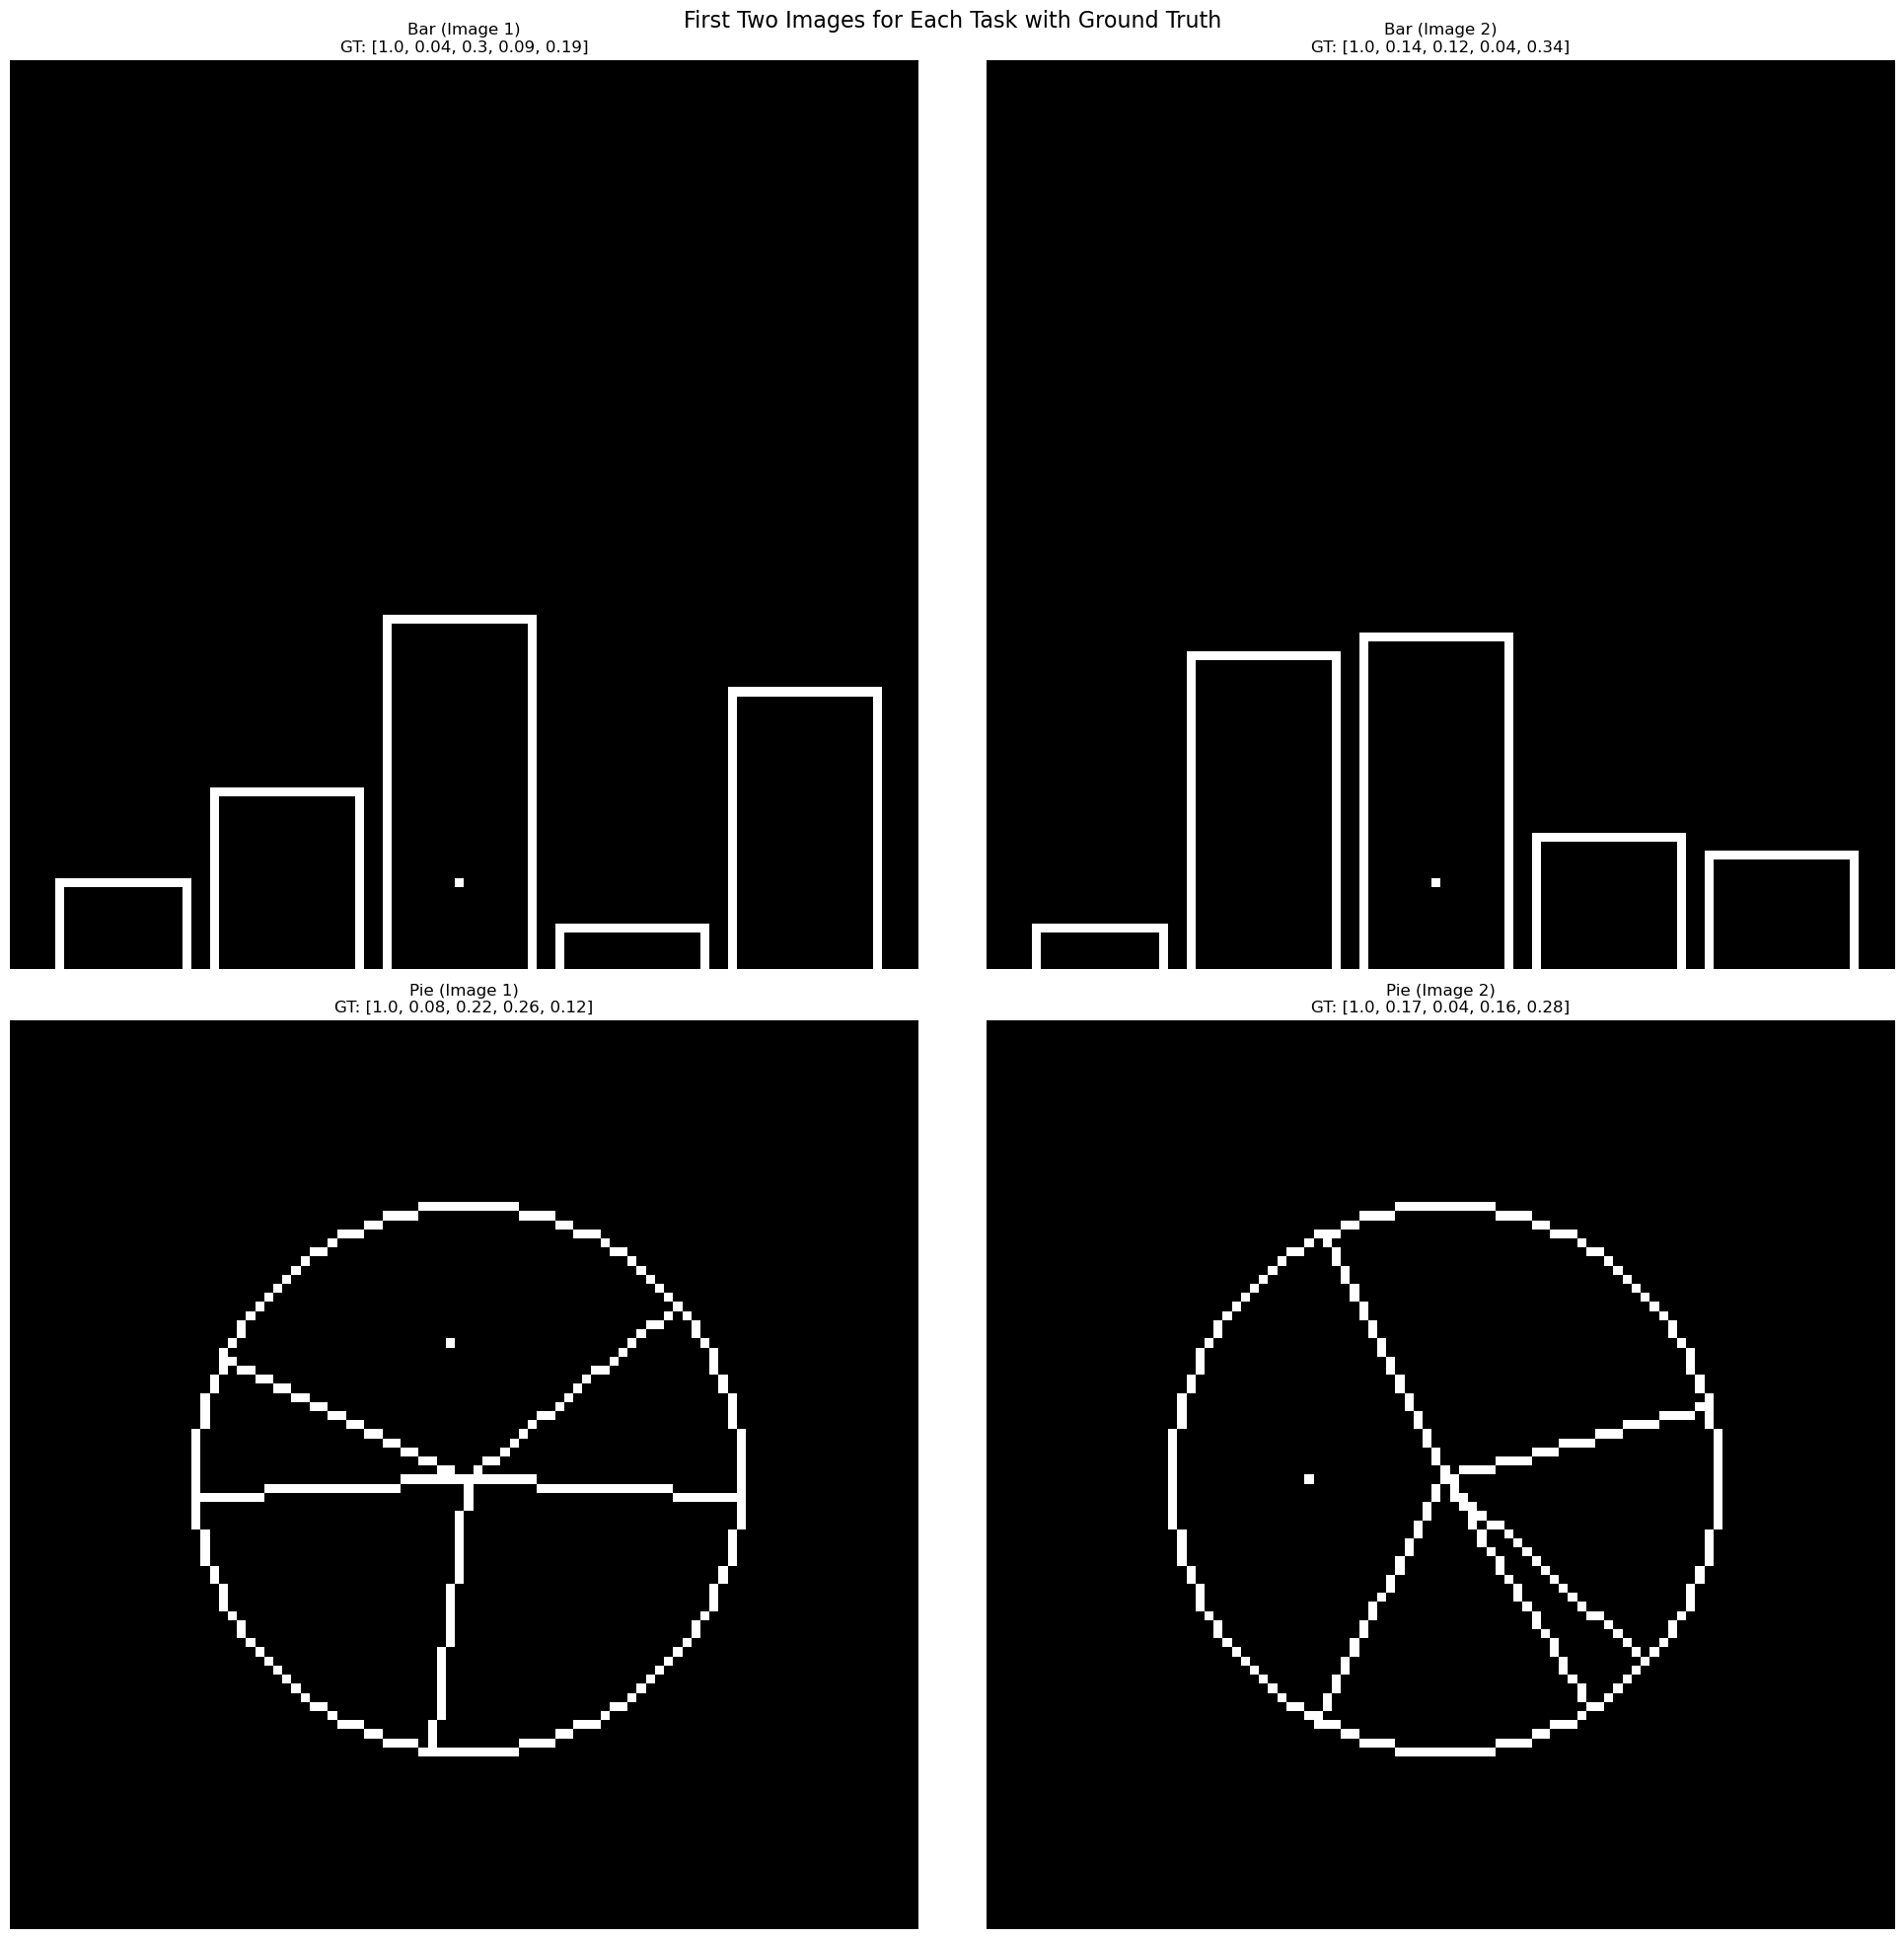

In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Define the base folder where images are located
base_folder = "." 

# List of CSV files to read
csv_files = [
    './bar_results.csv',
    './pie_results.csv',
]

# Number of columns and rows for the plot grid (adjusted for two images per task)
num_cols = 2
num_rows = 2  # Increased to fit two images per task

# Create a figure with subplots for displaying images in a 4-row grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle("First Two Images for Each Task with Ground Truth", fontsize=16)

# Flatten axes for easy iteration if there are multiple rows
axes = axes.flatten()

# Track the subplot index
subplot_idx = 0

# Loop through each CSV file and display the first two images for each task
for csv_file in csv_files:
    # Check if CSV file exists
    if not os.path.exists(csv_file):
        print(f"CSV file not found: {csv_file}")
        continue

    # Read the CSV file
    results_df = pd.read_csv(csv_file)

    # Extract the task name from the CSV filename (e.g., 'bar' from 'bar_results.csv')
    task = os.path.basename(csv_file).replace('_results.csv', '')

    # Loop through the first two rows to display two images for each task
    for i in range(2):  # Get the first two images
        if subplot_idx >= num_rows * num_cols:
            print("No more subplots available.")
            break

        row = results_df.iloc[i]
        
        # Use the full image path from the "image_path" column, joined with the base_folder
        image_filename = os.path.basename(row["image_path"])
        image_path = os.path.join(base_folder, task, image_filename)
        ground_truth = row["ground_truth"]

        # Display the image in the subplot
        if os.path.exists(image_path):
            img = Image.open(image_path)
            axes[subplot_idx].imshow(img, cmap="gray")
            axes[subplot_idx].set_title(f"{task.capitalize()} (Image {i+1})\nGT: {ground_truth}")
        else:
            print(f"Image not found: {image_path}")
            axes[subplot_idx].set_title(f"{task.capitalize()} (Image {i+1})\nImage not found")
        
        axes[subplot_idx].axis("off")
        subplot_idx += 1

# Hide any remaining empty subplots
for j in range(subplot_idx, num_rows * num_cols):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


### 5. Caculate all metrics

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import ast

# Dictionary to store metrics for each dataset
dataframes = {
    'bar': df_bar,
    'pie': df_pie
}

# Initialize a dictionary to store overall metrics
metrics_summary = {}

# Loop through each dataset and calculate MSE and MLAE for each row
for df_name, df in dataframes.items():
    # Ensure `ground_truth` and `parsed_answers` are lists of numeric values
    df['ground_truth'] = df['ground_truth'].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else x)
    df['parsed_answers'] = df['parsed_answers'].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else x)

    # Drop rows where either `ground_truth` or `parsed_answers` is NaN after conversion
    df = df.dropna(subset=['ground_truth', 'parsed_answers'])
    
    # Calculate Mean Squared Error (MSE) element-wise and add to DataFrame
    df['mse'] = df.apply(
        lambda row: np.mean((row['ground_truth'] - row['parsed_answers']) ** 2),
        axis=1
    )
    
    # Calculate Mean Log Absolute Error (MLAE) element-wise and add to DataFrame
    df['mlae'] = df.apply(
        lambda row: np.log2(mean_absolute_error(row['ground_truth'], row['parsed_answers']) + 0.125),
        axis=1
    )
    
    # Assign the updated DataFrame back to the corresponding variable name
    if df_name == 'bar':
        df_bar = df
    elif df_name == 'pie':
        df_pie = df

    # Initialize a dictionary to store metrics for each model within the dataset
    model_metrics = {}

    # Group by `model_name` to calculate model-level MLAE statistics
    for model_name, data in df.groupby('model_name'):
        # Calculate overall average MLAE and standard deviation of MLAE
        avg_mlae = data['mlae'].mean()
        std_mlae = data['mlae'].std()
        
        # Bootstrap confidence interval for MLAE
        mlae_values = data['mlae'].dropna().values  # Drop NaN values if any
        bootstrap_result = bs.bootstrap(np.array(mlae_values), stat_func=bs_stats.std)
        confidence_value = 1.96 * bootstrap_result.value  # 95% confidence interval margin for std deviation

        # Store calculated metrics in model_metrics dictionary
        model_metrics[model_name] = {
            'Dataset': df_name,
            'Model': model_name,
            'Average MLAE': round(avg_mlae, 2),
            'Confidence Interval (95%)': round(confidence_value, 2)
        }

    # Store model-level metrics for the current dataset in metrics_summary
    metrics_summary[df_name] = model_metrics

# Convert the nested metrics_summary dictionary to a DataFrame for easy viewing
metrics_table = pd.DataFrame([
    metrics for dataset_metrics in metrics_summary.values() for metrics in dataset_metrics.values()
])

# Display the resulting table of overall metrics
metrics_table


,Dataset,Model,Average MLAE,Confidence Interval (95%)
0,bar,CustomLLaMA,-2.81,0.44
1,pie,CustomLLaMA,-2.73,0.38


In [9]:
df_bar.head(3)

,model_name,run,image_path,ground_truth,raw_answers,parsed_answers,mse,mlae
0,CustomLLaMA,run_0,EXP2-Results/bar/bar_image_1.png,"[1.0, 0.375, 0.71875, 0.46875, 0.5625]","user\nFirst, make a list of five values where ...","[1.0, 0.38, 0.7, 0.47, 0.56]",0.000077,-2.937878
1,CustomLLaMA,run_0,EXP2-Results/bar/bar_image_2.png,"[1.0, 0.34210527, 0.7368421, 0.13157895, 0.421...","user\nFirst, make a list of five values where ...","[1.0, 0.37, 0.74, 0.16, 0.43]",0.000335,-2.850125
2,CustomLLaMA,run_0,EXP2-Results/bar/bar_image_3.png,"[1.0, 0.7368421, 0.13157895, 0.5263158, 0.2368...","user\nFirst, make a list of five values where ...","[1.0, 0.74, 0.17, 0.53, 0.26]",0.000407,-2.850125


In [10]:
df_pie.head(3)

,model_name,run,image_path,ground_truth,raw_answers,parsed_answers,mse,mlae
0,CustomLLaMA,run_0,EXP2-Results/pie/pie_image_1.png,"[1.0, 0.2857143, 0.6857143, 0.51428574, 0.3714...","user\nFirst, make a list of five values where ...","[1.0, 0.29, 0.68, 0.59, 0.44]",0.002097,-2.681704
1,CustomLLaMA,run_0,EXP2-Results/pie/pie_image_2.png,"[1.0, 0.90909094, 0.57575756, 0.21212122, 0.33...","user\nFirst, make a list of five values where ...","[1.0, 0.91, 0.64, 0.19, 0.38]",0.001359,-2.719872
2,CustomLLaMA,run_0,EXP2-Results/pie/pie_image_3.png,"[1.0, 0.33333334, 0.6969697, 0.42424244, 0.575...","user\nFirst, make a list of five values where ...","[1.0, 0.38, 0.7, 0.44, 0.64]",0.001312,-2.727959


### 6. Plot MLAE for all models


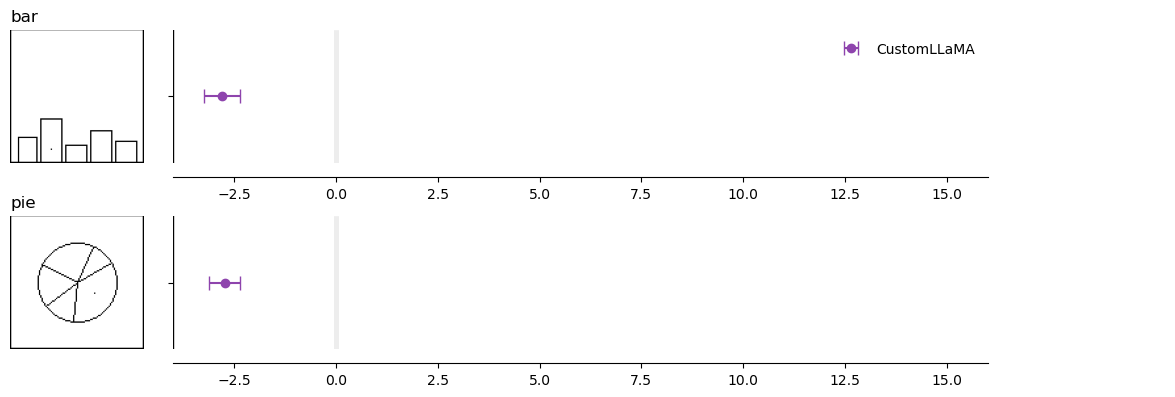

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import os

import os

# Group data by dataset for easier access
summary_stats_by_task = {df_name: metrics_table[metrics_table['Dataset'] == df_name] for df_name in metrics_table['Dataset'].unique()}

# Set the base directory
base_dir = '/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-5epochs/EXP2-Results-nonspecificprompt'

# Define task images relative to the base directory
task_images = {
    'pie': os.path.join(base_dir, 'pie', 'pie_image_1.png'),
    'bar': os.path.join(base_dir, 'bar', 'bar_image_1.png'),
   
}

# Check if each path exists and print
#for task, img_path in task_images.items():
    #print(f"Path for {task}: {img_path} - Exists: {os.path.isfile(img_path)}")


# Define colors for each model
model_colors = {
    'CustomLLaMA': '#8E44AD',       # Purple
    'Gemini1_5Flash': '#3498DB',    # Blue
    'GeminiProVision': '#E74C3C',   # Red
    'LLaMA': '#E67E22',             # Orange
    'gpt4o': '#27AE60'              # Green
}

# Plot configuration
num_tasks = len(summary_stats_by_task)
fig, axes = plt.subplots(num_tasks, 3, figsize=(12, 2 * num_tasks), 
                         gridspec_kw={'width_ratios': [1, 5, 1]}, sharex=False)
fig.subplots_adjust(hspace=0.5, wspace=0.3, left=0.05, right=0.95, top=0.95, bottom=0.05)
fig.patch.set_facecolor('white')

# Convert `axes` to 2D array if only one row of subplots
if num_tasks == 1:
    axes = axes.reshape(1, -1)

# Loop through each task (dataset) and its summary stats
for i, (task_name, task_data) in enumerate(summary_stats_by_task.items()):
    ax_img, ax_plot, ax_label = axes[i]

    # Clean task name to match keys in `task_images`
    cleaned_task_name = task_name.replace("df_", "")
    
    # Use the cleaned name to access the correct image path
    img_path = task_images.get(cleaned_task_name)
    
    # Display task image if available
    if os.path.exists(img_path):
        try:
            img = Image.open(img_path).convert("L")
            img_inverted = ImageOps.invert(img)
            img_with_border = ImageOps.expand(img_inverted.convert("RGB"), border=1, fill="black")
            ax_img.imshow(img_with_border)
            ax_img.axis('off')  # Hide axes for the image plot

        except Exception as e:
            #print(f"Error displaying image for {task_name}: {e}")
            ax_img.text(0.5, 0.5, "Error displaying image", ha="center", va="center", fontsize=10, color="black")
            ax_img.set_facecolor("white")
    else:
        #print(f"Image not found: {img_path}")
        ax_img.text(0.5, 0.5, "Image not found", ha="center", va="center", fontsize=10, color="black")
        ax_img.set_facecolor("white")

    # Sort model names alphabetically and get y positions
    sorted_model_names = sorted(task_data['Model'].unique())
    y_positions = np.arange(len(sorted_model_names))

    # Plot MLAE and error bars in the middle
    for j, model_name in enumerate(sorted_model_names):
        model_data = task_data[task_data['Model'] == model_name]
        mlae_value = model_data['Average MLAE'].values[0]
        confidence_interval = model_data['Confidence Interval (95%)'].values[0]

        ax_plot.errorbar(mlae_value, j, xerr=confidence_interval, fmt='o', 
                         color=model_colors.get(model_name, 'gray'), capsize=5, 
                         label=f"{model_name}" if i == 0 else None)

    # Add reference lines
    ax_plot.axvline(-4, color="black", linewidth=1)
    ax_plot.axvline(-14, color="black", linewidth=1)
    
    # Add blurred line at 0
    for offset in np.linspace(-0.05, 0.05, 10):
        ax_plot.axvline(0 + offset, color="gray", alpha=0.1, linewidth=0.5)

    # Customize plot appearance
    ax_plot.grid(False)
    ax_plot.spines['top'].set_visible(False)
    ax_plot.spines['right'].set_visible(False)
    ax_plot.spines['left'].set_visible(False)
    ax_plot.spines['bottom'].set_position(('outward', 10))

    # Set axis properties
    ax_plot.set_yticks(y_positions)
    ax_plot.set_yticklabels([])
    ax_plot.set_xlim(-4, 16)
    ax_plot.invert_yaxis()

    # Clean task name and set title
    cleaned_task_name = task_name.replace("df_", "")
    ax_img.set_title(cleaned_task_name, loc="left", fontsize=12, color="black")

    # Configure right labels
    ax_label.set_yticks(y_positions)
    ax_label.set_yticklabels(sorted_model_names, fontsize=10)
    ax_label.tick_params(left=False, right=False, labelleft=False, labelright=True)
    ax_label.set_ylim(ax_plot.get_ylim())
    ax_label.axis("off")

# Add legend to the first row
axes[0, 1].legend(loc="best", frameon=False)

# Ensure tight layout
plt.tight_layout()
plt.show()


### 7. Filter and sort model data and caculate for each model

In [41]:
pwd

'/home/huuthanhvy.nguyen001/LLMP/EXP/EXP2-Results'

### 8. Display 5 images for each task

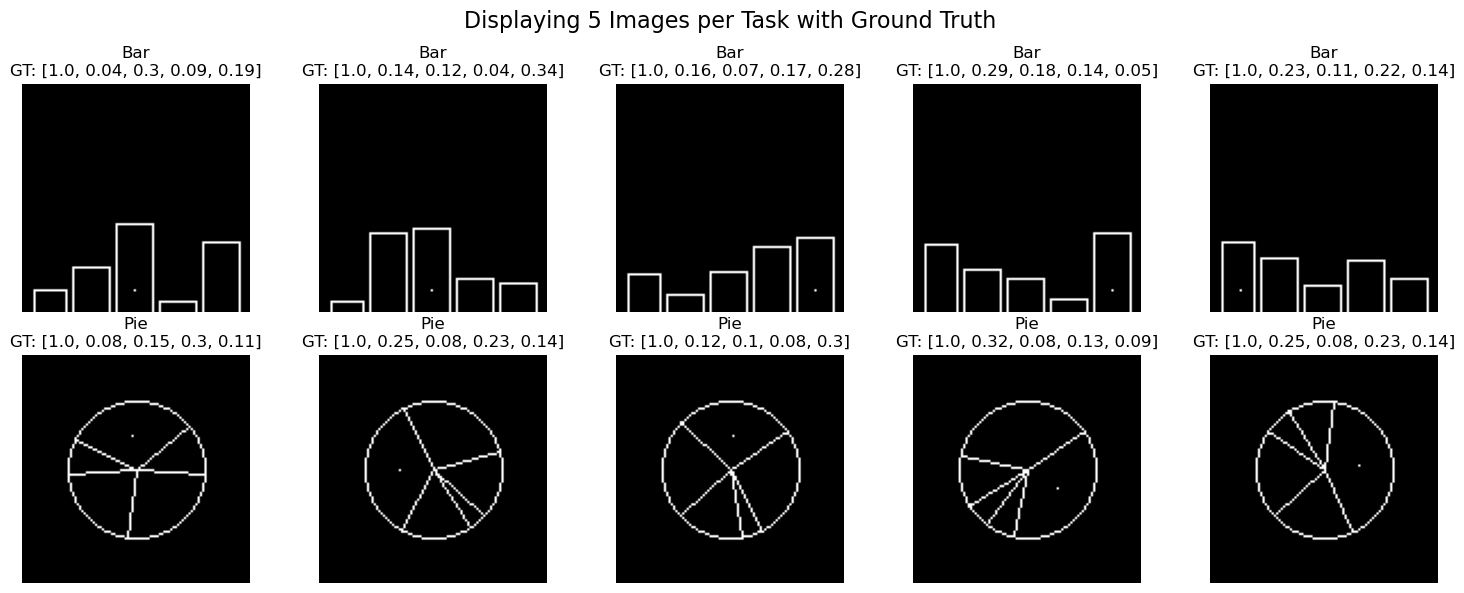

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Define the base folder where images are located
base_folder = "." 

# Dictionary of CSV files for each task
csv_files = {
    'bar': './bar_results.csv', 
    'pie': './pie_results.csv'
}

def display_images(num_images, tasks="all"):
    """
    Display a specified number of images for selected tasks with ground truth labels.
    
    Parameters:
    - num_images: int, the number of images to display per task
    - tasks: list or "all", specifies which tasks to display images for
    """
    # Use all tasks if 'tasks' parameter is "all"
    selected_tasks = list(csv_files.keys()) if tasks == "all" else tasks

    # Calculate total number of subplots needed
    total_images = len(selected_tasks) * num_images
    num_cols = 5
    num_rows = (total_images + num_cols - 1) // num_cols  # Automatically adjust rows

    # Create figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
    fig.suptitle(f"Displaying {num_images} Images per Task with Ground Truth", fontsize=16)
    
    # Flatten axes for easy iteration
    axes = axes.flatten()

    plot_idx = 0  # To keep track of the current subplot index
    for task in selected_tasks:
        # Check if the CSV file exists for the task
        csv_file = csv_files.get(task)
        if not os.path.exists(csv_file):
            print(f"CSV file not found: {csv_file}")
            continue

        # Load CSV data
        results_df = pd.read_csv(csv_file)

        # Limit to num_images or the number of rows in the CSV, whichever is smaller
        num_to_display = min(num_images, len(results_df))

        # Loop to display each image for the task
        for i in range(num_to_display):
            if plot_idx >= num_rows * num_cols:
                break
            
            # Get the row data and image path
            row = results_df.iloc[i]
            image_filename = row["image_path"]

            # Check if image path is a valid string before proceeding
            if pd.isna(image_filename) or not isinstance(image_filename, str):
                print(f"Invalid image path for {task}, row {i}: {image_filename}")
                axes[plot_idx].set_title(f"{task.capitalize()}\nInvalid Image Path")
                axes[plot_idx].axis("off")
                plot_idx += 1
                continue

            image_path = os.path.join(base_folder, task, os.path.basename(image_filename))
            ground_truth = row["ground_truth"]

            # Display image if exists, else show 'Image not found'
            if os.path.exists(image_path):
                img = Image.open(image_path)
                axes[plot_idx].imshow(img, cmap="gray")
                axes[plot_idx].set_title(f"{task.capitalize()}\nGT: {ground_truth}")
            else:
                print(f"Image not found: {image_path}")
                axes[plot_idx].set_title(f"{task.capitalize()}\nImage not found")

            axes[plot_idx].axis("off")
            plot_idx += 1

    # Hide any remaining empty subplots
    for j in range(plot_idx, num_rows * num_cols):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Example usage to display images from bar and pie tasks
display_images(num_images=5, tasks=["bar", "pie"])
